<a href="https://colab.research.google.com/github/sisifo3/P_T_3/blob/main/Gaussian_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/NIH_dataset/CheXpert-v1.0-small-1.zip 

Streaming output truncated to the last 5000 lines.
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view2_lateral.jpg  
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study1/
  inflating: CheXpert-v1.0-small/train/patient21643/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study2/
  inflating: CheXpert-v1.0-small/train/patient21643/study2/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63218/
   creating: CheXpert-v1.0-small/train/patient63218/study1/
  inflating: CheXpert-v1.0-small/train/patient63218/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/
   creating: CheXpert-v1.0-small/train/patient08046/study1/
  inflating: CheXpert-v1.0-small/train/patient08046/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/study5/
  inflating: CheXpert-v1.0-small/train/patient08046/study5/view1_fron

In [ ]:
import cv2
import numpy as np
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates

random_state = np.random.RandomState(0)

def clahe(image_name):
    image = cv2.imread(image_name, 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    he_img = clahe.apply(image)
    image = cv2.cvtColor(he_img, cv2.COLOR_GRAY2RGB)

    return Image.fromarray(image)


In [ ]:
def elastic_transform(image, alpha, sigma):
    image = np.asarray(image)

    if len(image.shape) < 3:
        image = image.reshape(image.shape[0], image.shape[1], -1)

    shape = image.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x + dx, (-1, 1)), np.reshape(y + dy, (-1, 1)), np.reshape(z, (-1, 1))

    distorted_image = map_coordinates(image, indices, order=0, mode='reflect')

    return Image.fromarray(distorted_image.reshape(image.shape))

def get_aug(image, index):
    if (index == 0):
        return image
    else:
        alpha = np.random.uniform(500,1000)
        sigma = np.random.uniform(9, 10)
        input_transformed = elastic_transform(image, alpha=alpha, sigma=sigma)
        return  input_transformed

In [ ]:

def get_aug(image, index):
    if (index == 0):
        return image
    else:
        alpha = np.random.uniform(500,1000)
        sigma = np.random.uniform(9, 10)
        input_transformed = elastic_transform(image, alpha=alpha, sigma=sigma)
        return  input_transformed

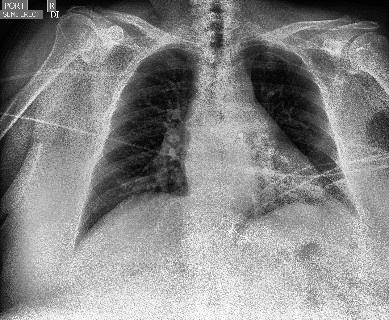

In [ ]:
image_name = '/content/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

clahe(image_name)

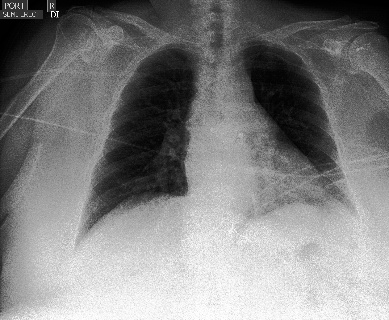

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread(image_name, 0)
cv2_imshow(image)
